In [ ]:
#importing mobility pattern matrix
import pandas as pd
#setting current working directory 
%cd /content/drive/My Drive/Summer Intern Project/Contact Network

df=pd.read_csv("Real_mobility_dataset.csv", header=None)

### for one train


*  from the online research we came to know that around 30 train run on kgp-hwh route dailly. so we divided total passenger count by 30 for each value.



In [ ]:
#converting string columns to appropriate numeric values
df.loc[1:,1:]=df.loc[1:,1:].apply(pd.to_numeric)

In [ ]:
#diving each value by 30
df.loc[1:,1:]=df.loc[1:,1:]//30

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,NaN,KHARAGPUR,JAKPUR,MADPUR,SHYAM CHAK,BALICHAK,DUAN,RADHAMOHANPUR,HAUR,KHIRAI,PANSKURA,NARAYAN PAKURIA MURA,BHOGPUR,NANDAIGAJAN P.H.,MECHEDA,KOLAGHAT,DEULTI,GHORAGHATA,BAGNAN,KULGACHIA,BIRSHIBPUR,ULUBARIA,FULESWAR,CHENGEL,BAURIA JN.,NALPUR,ABADA,SANKRAIL,ANDUL,MAURIGRAM,SANTRAGACHI JN,RAMRAJATALA,DASHNAGAR,TIKIAPARA,HOWRAH
1,KHARAGPUR,0,5,10,6,16,0,3,1,0,58,0,0,0,29,4,2,0,8,0,0,3,0,0,2,0,0,0,0,1,16,0,0,0,111
2,JAKPUR,0,0,1,0,4,0,0,0,0,3,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,MADPUR,0,0,0,0,8,0,2,0,0,4,0,0,0,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
4,SHYAM CHAK,0,0,0,0,2,0,0,15,0,2,0,0,0,2,16,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
5,BALICHAK,0,0,0,0,0,0,2,7,3,12,0,0,0,27,23,5,2,5,0,0,9,0,0,14,1,0,0,3,0,1,0,0,0,76
6,DUAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,RADHAMOHANPUR,0,0,0,0,0,0,0,0,0,19,0,0,0,11,20,1,0,14,2,0,0,0,0,1,0,0,2,0,0,1,0,0,0,12
8,HAUR,0,0,0,0,0,0,0,0,0,42,0,4,6,13,8,0,0,9,1,5,0,0,0,2,0,0,0,0,9,2,2,0,0,28
9,KHIRAI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#getting no of passenger boarded at each station
ent=[]
for i in range(1,35):
  sum1=0
  for j in range(1,35):
    sum1+=int(df.iloc[i,j])
  ent.append(sum1)
print('ent:',ent)

#getting no of passenger deboarded at each station
deb=[]
for i in range(1,35):
  sum1=0
  for j in range(1,35):
    sum1+=int(df.iloc[j,i])
  deb.append(sum1)
print('deb:',deb)

# getting station names
station=[]
for i in range(1,35):
    sum1=(df.iloc[0,i])
    station.append(sum1)
print('station:',station)

# total no of people that will board the train
sum1=0
for i in ent:
  sum1+=int(i)

print('total baording passengers:',sum1)

ent: [275, 13, 33, 46, 190, 0, 83, 131, 0, 350, 0, 118, 36, 492, 218, 174, 88, 835, 241, 143, 380, 119, 89, 239, 206, 48, 218, 172, 115, 91, 63, 17, 8, 0]
deb: [0, 5, 11, 6, 30, 0, 7, 23, 3, 140, 0, 9, 7, 175, 154, 57, 2, 198, 60, 32, 243, 61, 60, 65, 60, 11, 111, 136, 84, 265, 77, 150, 486, 2503]
station: ['KHARAGPUR', 'JAKPUR', 'MADPUR', 'SHYAM CHAK', 'BALICHAK', 'DUAN', 'RADHAMOHANPUR', 'HAUR', 'KHIRAI', 'PANSKURA', 'NARAYAN PAKURIA MURA', 'BHOGPUR', 'NANDAIGAJAN P.H.', 'MECHEDA', 'KOLAGHAT', 'DEULTI', 'GHORAGHATA', 'BAGNAN', 'KULGACHIA', 'BIRSHIBPUR', 'ULUBARIA', 'FULESWAR', 'CHENGEL', 'BAURIA JN.', 'NALPUR', 'ABADA', 'SANKRAIL', 'ANDUL', 'MAURIGRAM', 'SANTRAGACHI JN', 'RAMRAJATALA', 'DASHNAGAR', 'TIKIAPARA', 'HOWRAH']
total baording passengers: 5231


In [ ]:
import operator
import numpy as np

print(len(ent),len(deb),len(station))
#net passenger boarding=no of boarded passenger- no of deboarded passenger at each station
print("net boarding passengers at each station:\n" ,list(map(operator.sub, ent,deb)))
# expected no of passengers after each station
print('expected no of passengers after each station:')
np.cumsum(list(map(operator.sub, ent,deb)))

34 34 34
net boarding passengers at each station:
 [275, 8, 22, 40, 160, 0, 76, 108, -3, 210, 0, 109, 29, 317, 64, 117, 86, 637, 181, 111, 137, 58, 29, 174, 146, 37, 107, 36, 31, -174, -14, -133, -478, -2503]
expected no of passengers after each station:


array([ 275,  283,  305,  345,  505,  505,  581,  689,  686,  896,  896,
       1005, 1034, 1351, 1415, 1532, 1618, 2255, 2436, 2547, 2684, 2742,
       2771, 2945, 3091, 3128, 3235, 3271, 3302, 3128, 3114, 2981, 2503,
          0])

In [ ]:
import random
import numpy as np

## parameters

#no of compartment in the train
no_comp=12
# maximum capacity of each compartment
max_cap=300 # change
# no of station on the root
no_stat=34
#no of extra passenger boarded
bor_ex=[]

#funtion to return no of people present in train at point of time
def no_people_train(train):
  sum1=0
  for i in range(len(train)):
    sum1+=len(train[i]['curr_pop'])
  return sum1

# function creates train with comp_name ,curr_pop and max_cap to each comp
def create_train(max_cap):
  train=[]
  for i in range(no_comp):
    comp={'comp_no':i+1,'curr_pop':[]}
    train.append(comp)
  return train

# function to randomly generate no of passenger for each comp at each station given total no of boarding passenger
def pass_each_comps_pos(n, total):
    """Return a randomly chosen list of n positive integers summing to total.
    """

    dividers = sorted(random.sample(range(1, (total)), n - 1))
    return [a - b for a, b in zip(dividers + [(total)], [0] + dividers)]

def pass_each_comps(n, total):
    """Return a randomly chosen list of n nonnegative integers summing to total.
    """
    return [x - 1 for x in pass_each_comps_pos(n, total + n)]



#function deboards passenger from each comp of train which takes train and station index as input
def deboard_pass(train,i,complete):    
    #getting dataframe of passenger whose debaording station is this with column boarded comp and agent id's
    temp=(complete[complete[3]==station[i]][[0,1]])    
    for a,b in zip(temp[0], temp[1]):
          train[a]['curr_pop'].remove(b)

    return train,complete

#this function boards the passengers to compartment where maximum capacity is not reached from ex_bor list
def ex_bor(bor_ex,train,pos,pas_ent,complete):
  #go to right in search of empty compartment
  j=pos+1
  while len(bor_ex)>0 and j<len(train):
    # check if next compartment capacity will excede max_cap if pass entered in next compartment .if not then only we try to assign pass to that comp.
    if pas_ent[j]+len(train[j]['curr_pop'])<max_cap:
      if len(train[j]['curr_pop'])+len(bor_ex)+pas_ent[j]>max_cap :
        #calculate no of people to board in curr compartment,frm here indicates index upto which passengers will be boarded
        frm=max_cap-len(train[j]['curr_pop'])-pas_ent[j]
        train[j]['curr_pop'].extend(bor_ex[:frm])
        as_list=list(bor_ex[:frm])
        as_list[:] = [number - 1 for number in as_list]
        complete.at[as_list,0]=j
        bor_ex=bor_ex[frm:]      

      elif len(train[j]['curr_pop'])+len(bor_ex)+pas_ent[j]<=max_cap:
        #print('bor_ex_in',bor_ex)
        train[j]['curr_pop'].extend(bor_ex)
        as_list=list(bor_ex)
        as_list[:] = [number - 1 for number in as_list]
        complete.at[as_list,0]=j
        bor_ex=[]
      j=j+1
    else:
      j=j+1
  #go to left in search of empty compartment
  k=pos-1
  while len(bor_ex)>0 and k>=0:
    if len(train[k]['curr_pop'])+len(bor_ex)>max_cap :
        #calculate no of people to board in curr compartment,frm here indicates index upto which passengers will be boarded
        frm=max_cap-len(train[k]['curr_pop'])
        train[k]['curr_pop'].extend(bor_ex[:frm])
        as_list=list(bor_ex[:frm])
        as_list[:] = [number - 1 for number in as_list]
        complete.at[as_list,0]=k
        bor_ex=bor_ex[frm:]
        

    elif len(train[k]['curr_pop'])+len(bor_ex)<=max_cap:
      train[k]['curr_pop'].extend(bor_ex)
      as_list=list(bor_ex)
      as_list[:] = [number - 1 for number in as_list]
      complete.at[as_list,0]=k
      bor_ex=[]
    k=k-1

  return train,bor_ex,complete

def board_pass(train,pas_ent,bor_ex,stn_pop,complete):
  for j in range(len(pas_ent)):
    curr_pass=[]
    for i in range(pas_ent[j]):
      choice =random.choice(stn_pop)
      curr_pass.append(choice)
      stn_pop.remove(choice)
    if len(train[j]['curr_pop'])+len(curr_pass)>max_cap:
      frm=max_cap-len(train[j]['curr_pop'])
      train[j]['curr_pop'].extend(curr_pass[:frm])
      as_list=list(curr_pass[:frm])
      as_list[:] = [number - 1 for number in as_list]
      complete.at[as_list,0]=j
      bor_ex.extend(curr_pass[frm:])
      train,bor_ex,complete=ex_bor(bor_ex,train,j,pas_ent,complete)
    else:
      train[j]['curr_pop'].extend(curr_pass)
      as_list=list(curr_pass)
      as_list[:] = [number - 1 for number in as_list]
      complete.at[as_list,0]=j

  return train,bor_ex,complete



#creating agent with attributes agent_id,boarding_stn,deboarding_stn which takes inputs no of agents to create, bor station, deboarding station and start to indicate from where agent unique id should start 
def create_agent(no_agent,bor_stn,debor_stn,start,complete):
  pop=[]
  for i in range(start,start+no_agent):
    comp=i+1
    comp1=pd.DataFrame([['',i+1,bor_stn,debor_stn]])
    pop.append(comp)
    complete=complete.append(comp1, ignore_index=True)
  
  return pop,complete

def act_ag_stn(i,df,ag_sum,complete):
  stn_pop=[]

  for j in range(1,df.shape[1]):
    agents,complete=create_agent(int(df.iloc[i,j]),df.iloc[:,0][i],df.iloc[0,:][j],ag_sum,complete)
    ag_sum+=int(df.iloc[i,j])
    stn_pop.extend(agents)
  
  return stn_pop,complete

print('doing train simulation.')
train=create_train(max_cap)
ag_sum=0
pas=[]
complete=complete=pd.DataFrame()
import time
start1=time.time()
for i in range(no_stat):
  pas_ent=pass_each_comps(no_comp,ent[i])
  if i!=0:
    train,complete=deboard_pass(train,i,complete)
  stn_pop,complete=act_ag_stn(i+1,df,ag_sum,complete)
  train,bor_ex,complete=board_pass(train,pas_ent,bor_ex,stn_pop,complete)
  ag_sum+=ent[i]
  pas.append(train)

print('train simulation is completed and passenger travelling dataset is ready')
print('time taken for simulation:', time.time()-start1,'sec')  


doing train simulation
train simulation is completed and passenger travelling dataset is ready
time taken for simulation: 11.935311555862427 sec


In [ ]:
complete.head()

,0,1,2,3
0,7,1,KHARAGPUR,JAKPUR
1,10,2,KHARAGPUR,JAKPUR
2,6,3,KHARAGPUR,JAKPUR
3,10,4,KHARAGPUR,JAKPUR
4,3,5,KHARAGPUR,JAKPUR


In [ ]:
complete.shape

(5231, 4)

### naming the columns

In [ ]:
complete.columns =['Compartment_Boarded','Agent_Id','Boarding_Station','Deboarding_Station']

In [ ]:
complete.head()

,Compartment_Boarded,Agent_Id,Boarding_Station,Deboarding_Station
0,11,1,KHARAGPUR,JAKPUR
1,5,2,KHARAGPUR,JAKPUR
2,4,3,KHARAGPUR,JAKPUR
3,1,4,KHARAGPUR,JAKPUR
4,5,5,KHARAGPUR,JAKPUR


In [ ]:
#passenger in compartment 1
complete[complete['Compartment_Boarded']==0]

,Compartment_Boarded,Agent_Id,Boarding_Station,Deboarding_Station
24,0,25,KHARAGPUR,BALICHAK
26,0,27,KHARAGPUR,BALICHAK
27,0,28,KHARAGPUR,BALICHAK
36,0,37,KHARAGPUR,BALICHAK
37,0,38,KHARAGPUR,RADHAMOHANPUR
...,...,...,...,...
5143,0,5144,RAMRAJATALA,HOWRAH
5148,0,5149,RAMRAJATALA,HOWRAH
5197,0,5198,RAMRAJATALA,HOWRAH
5209,0,5210,DASHNAGAR,HOWRAH


### creating contact graph from dataframe

In [ ]:
import itertools
from datetime import datetime
import timeit
import networkx as nx
start = timeit.default_timer()
#suspention time in sec
susp_time=600
# finding all pairs of 2 agent id's between agents who travelled in same compartment
pairs=[]
#getting all comp no's
comps=sorted(complete['Compartment_Boarded'].unique())
for z in comps:
  temp=complete[complete['Compartment_Boarded']==z]
  pairs.extend(list(itertools.combinations(temp['Agent_Id'], 2)))

#creating rank dictonary for station comarison where key is station name and value is station values
rank={}
for i,stn in enumerate(station):
  rank[stn]=i

#list containing arrival time of train at each station. time is in hh:mm format.
arr_time=['17:45','17:49','17:54','17:59','18:04','18:08','18:12','18:16','18:20','18:26','18:32','18:37','18:41','18:45','18:49','18:54','18:59','19:03','19:08','19:12','19:17','19:22','19:27','19:33','19:39','19:44','19:48','19:54','19:58','20:06','20:10','20:14','20:18','20:42']
FMT = '%H:%M'

#creating empty graph 
G1 = nx.Graph()

# adding nodes and edges to graph
k=0
for i in pairs:
  k+=1
  if k%100000==0:
    print('done for',k,'pairs')
  #getting the station between which agents in pair travelled together
  bor_stn=max(rank[complete.at[i[0]-1,'Boarding_Station']],rank[complete.at[i[1]-1,'Boarding_Station']]) 
  debor_stn=min(rank[complete.at[i[0]-1,'Deboarding_Station']],rank[complete.at[i[1]-1,'Deboarding_Station']])
  #pasenger boarded same comp after other paired person left compartment
  if bor_stn>=debor_stn:
    time_diff=datetime.strptime(arr_time[bor_stn], FMT) - datetime.strptime(arr_time[debor_stn], FMT)
    if time_diff.total_seconds()>= susp_time:
      continue
    else:
      G1.add_edges_from([(i[0], i[1],{'weight':susp_time - time_diff.total_seconds()})])
  else:
    #adding edges with weight (time of contact in sec)
    tdelta = datetime.strptime(arr_time[debor_stn], FMT) - datetime.strptime(arr_time[bor_stn], FMT)
    G1.add_edges_from([(i[0], i[1],{'weight':tdelta.total_seconds()})]) 
stop = timeit.default_timer()
print('Time: ', stop - start) 
# time - 46 seconds

done for 100000 pairs
done for 200000 pairs
done for 300000 pairs
done for 400000 pairs
done for 500000 pairs
done for 600000 pairs
done for 700000 pairs
done for 800000 pairs
done for 900000 pairs
done for 1000000 pairs
done for 1100000 pairs
Time:  47.17415128899984


In [ ]:
#returns the no of nodes in the graph
nx.classes.function.number_of_nodes(G1)

5231

In [ ]:
#returns the no of edges in the graph (susp_time=0)
nx.classes.function.number_of_edges(G1)

809215

In [ ]:
#average degree of graph (susp_time =0)
sum([v for k, v in G1.degree()])/len(G1)

309.39208564328044

In [ ]:
#returns the no of edges in the graph (susp_time=120 s)
nx.classes.function.number_of_edges(G1)

857144

In [ ]:
#average degree of graph (susp_time =120 s)
sum([v for k, v in G1.degree()])/len(G1)

327.7170713056777

In [ ]:
#returns the no of edges in the graph (susp_time=600 s)
nx.classes.function.number_of_edges(G1)

892181

In [ ]:
#average degree of graph (susp_time =600 s)
sum([v for k, v in G1.degree()])/len(G1)

341.1129803096922

### visualizing network graph



/content/drive/My Drive/Summer Intern Project/Contact Network


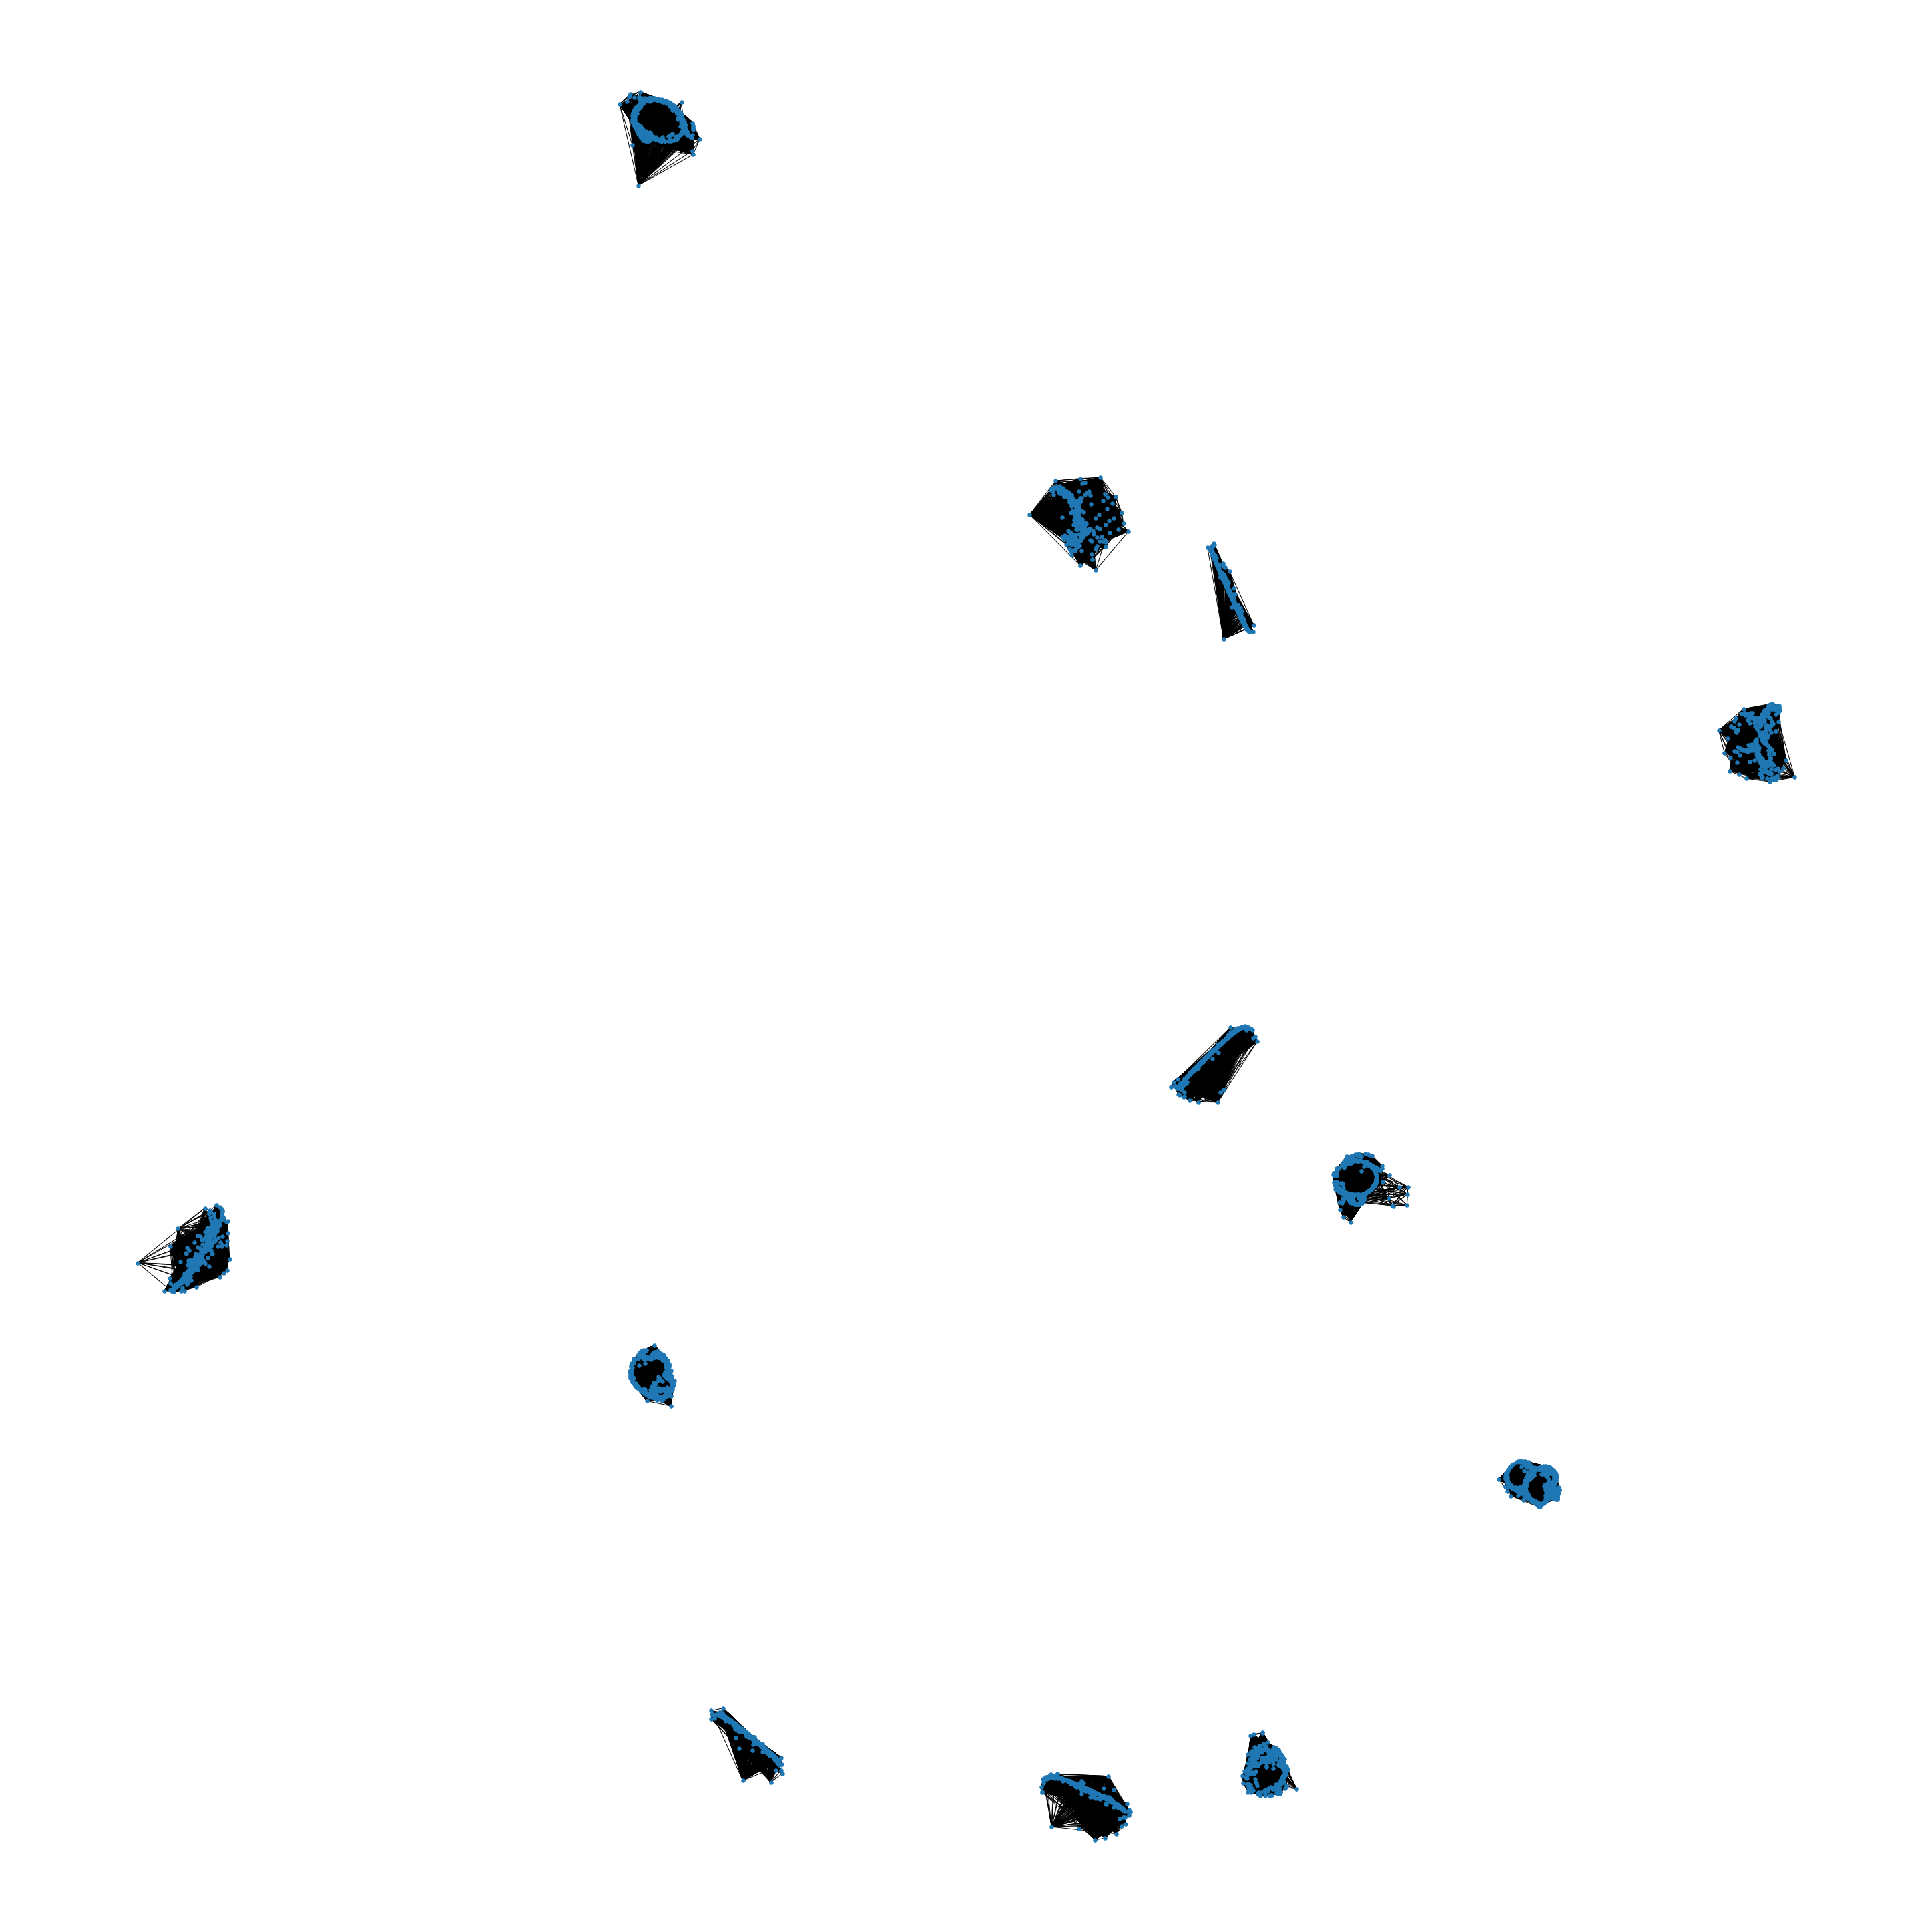

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting whole graph
%cd /content/drive/My Drive/Summer Intern Project/Contact Network
import networkx as nx 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(40, 40)) 
nx.draw(G1, node_size=30) 
plt.axis('equal') 
plt.show() 
plt.savefig("network_graph.svg")

In [ ]:
# plotting only some node of graph and connection between them  
H = G1.subgraph([4,25,27,38])
pos = nx.spring_layout(G1,k=0.2,iterations=10)
nx.draw(H,pos,with_labels=True) 

{(27,
  28): Text(-0.24999993294477343, -0.7694209117189807, "{'weight': 1140.0}"),
 (37, 27): Text(-0.2500000074505807, 0.1816356154972723, "{'weight': 1140.0}"),
 (37,
  28): Text(0.30901703493029536, 5.3644181319256745e-08, "{'weight': 1140.0}"),
 (37, 38): Text(-0.2500000670552266, 0.7694208997980517, "{'weight': 1140.0}"),
 (38,
  27): Text(-0.8090170349302954, -6.55651103964594e-08, "{'weight': 1140.0}"),
 (38,
  28): Text(-0.24999999254941926, -0.18163562741820138, "{'weight': 1140.0}")}

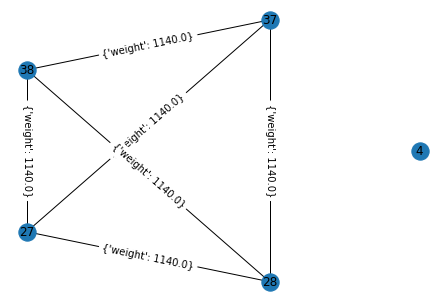

In [ ]:
H = G1.subgraph([4,27,28,37,38])
nx.draw_circular(H,with_labels=True)
pos = nx.drawing.layout.circular_layout(H)
edge_labels = nx.get_edge_attributes(H,'weight')
nx.draw_networkx_edge_labels(H,pos, labels = edge_labels)

In [ ]:
# data of edges in graph H
H.edges(data=True)

EdgeDataView([(37, 27, {'weight': 1140.0}), (37, 28, {'weight': 1140.0}), (37, 38, {'weight': 1140.0}), (38, 27, {'weight': 1140.0}), (38, 28, {'weight': 1140.0}), (27, 28, {'weight': 1140.0})])

In [ ]:
#degrees of each node in graph
G1.degree()

DegreeView({25: 41, 27: 41, 28: 41, 37: 41, 38: 56, 45: 59, 47: 59, 61: 59, 71: 59, 79: 59, 103: 78, 111: 78, 113: 78, 115: 78, 119: 78, 124: 78, 131: 183, 133: 196, 151: 447, 168: 457, 171: 457, 180: 457, 184: 457, 185: 457, 193: 457, 197: 457, 199: 457, 222: 457, 225: 457, 226: 457, 238: 457, 247: 457, 269: 457, 275: 457, 285: 78, 287: 457, 333: 58, 337: 58, 343: 183, 352: 183, 353: 183, 358: 183, 368: 52, 370: 54, 382: 55, 408: 74, 409: 74, 412: 74, 421: 179, 435: 179, 447: 211, 454: 296, 459: 296, 496: 453, 509: 453, 535: 453, 542: 453, 559: 53, 600: 177, 717: 206, 780: 62, 782: 62, 912: 180, 943: 248, 1070: 441, 1085: 441, 1116: 441, 1122: 167, 1123: 167, 1134: 167, 1136: 167, 1150: 167, 1162: 199, 1163: 199, 1183: 338, 1201: 441, 1203: 441, 1204: 441, 1220: 441, 1276: 155, 1282: 155, 1284: 155, 1285: 155, 1286: 155, 1288: 155, 1289: 168, 1290: 187, 1291: 187, 1302: 187, 1306: 187, 1310: 187, 1320: 187, 1326: 187, 1329: 187, 1332: 187, 1335: 187, 1349: 187, 1350: 187, 1352: 187, 1

In [ ]:
#gives degree of set of node and its edges
print(G1.degree[5086] )
print(G1.edges(5086))

299
[(5086, 183), (5086, 190), (5086, 201), (5086, 211), (5086, 217), (5086, 218), (5086, 220), (5086, 223), (5086, 232), (5086, 239), (5086, 243), (5086, 244), (5086, 249), (5086, 265), (5086, 266), (5086, 270), (5086, 273), (5086, 274), (5086, 320), (5086, 483), (5086, 742), (5086, 751), (5086, 752), (5086, 755), (5086, 765), (5086, 1046), (5086, 1059), (5086, 1187), (5086, 1190), (5086, 1191), (5086, 1194), (5086, 1198), (5086, 1207), (5086, 1212), (5086, 1213), (5086, 1214), (5086, 1217), (5086, 1223), (5086, 1226), (5086, 1232), (5086, 1233), (5086, 1235), (5086, 1236), (5086, 1260), (5086, 1265), (5086, 1268), (5086, 1272), (5086, 1274), (5086, 1523), (5086, 1526), (5086, 1537), (5086, 1544), (5086, 1549), (5086, 1553), (5086, 1564), (5086, 1567), (5086, 1571), (5086, 1574), (5086, 1581), (5086, 1583), (5086, 1598), (5086, 1602), (5086, 1603), (5086, 1604), (5086, 1605), (5086, 1610), (5086, 1617), (5086, 1628), (5086, 1632), (5086, 1635), (5086, 1640), (5086, 1642), (5086, 1643)

In [ ]:
complete[complete['Compartment_Boarded']==0]

,Compartment_Boarded,Agent_Id,Boarding_Station,Deboarding_Station
24,0,25,KHARAGPUR,BALICHAK
26,0,27,KHARAGPUR,BALICHAK
27,0,28,KHARAGPUR,BALICHAK
36,0,37,KHARAGPUR,BALICHAK
37,0,38,KHARAGPUR,RADHAMOHANPUR
...,...,...,...,...
5143,0,5144,RAMRAJATALA,HOWRAH
5148,0,5149,RAMRAJATALA,HOWRAH
5197,0,5198,RAMRAJATALA,HOWRAH
5209,0,5210,DASHNAGAR,HOWRAH


In [ ]:
print(G1.edges(25,data=True))

[(25, 27, {'weight': 1140.0}), (25, 28, {'weight': 1140.0}), (25, 37, {'weight': 1140.0}), (25, 38, {'weight': 1140.0}), (25, 45, {'weight': 1140.0}), (25, 47, {'weight': 1140.0}), (25, 61, {'weight': 1140.0}), (25, 71, {'weight': 1140.0}), (25, 79, {'weight': 1140.0}), (25, 103, {'weight': 1140.0}), (25, 111, {'weight': 1140.0}), (25, 113, {'weight': 1140.0}), (25, 115, {'weight': 1140.0}), (25, 119, {'weight': 1140.0}), (25, 124, {'weight': 1140.0}), (25, 131, {'weight': 1140.0}), (25, 133, {'weight': 1140.0}), (25, 151, {'weight': 1140.0}), (25, 168, {'weight': 1140.0}), (25, 171, {'weight': 1140.0}), (25, 180, {'weight': 1140.0}), (25, 184, {'weight': 1140.0}), (25, 185, {'weight': 1140.0}), (25, 193, {'weight': 1140.0}), (25, 197, {'weight': 1140.0}), (25, 199, {'weight': 1140.0}), (25, 222, {'weight': 1140.0}), (25, 225, {'weight': 1140.0}), (25, 226, {'weight': 1140.0}), (25, 238, {'weight': 1140.0}), (25, 247, {'weight': 1140.0}), (25, 269, {'weight': 1140.0}), (25, 275, {'weig

In [ ]:
complete[complete['Agent_Id']==600]
# we can see there is edge between ag_no 25 and ag_no 600 since difference between boarding of agent_no 600 and debaording of ag_no 25 is 480 < 600 set in our network. 

,Compartment_Boarded,Agent_Id,Boarding_Station,Deboarding_Station
599,0,600,RADHAMOHANPUR,KOLAGHAT


In [ ]:
# running executable python file of creating contact graph
! python Executable_Python_File_Create_Contact_Network_on_Real_Dataset.py

doing train simulation.
train simulation is completed and travelling passenger  dataset is ready
time taken for simulation: 11.706075429916382 sec
Creating passengers contact graph
Time to create contact network:  47.385790627999995
pasenger contact network graph is created.you can access the graph with variable named G1 
graph has  5231 nodes and  890807 edges


In [ ]:
#no of edges in graph
nx.classes.function.number_of_nodes(G1)

5231